# Práctica Interpolación (Métodos Recursividad)

**Nombre :** Jesús Muñoz Velasco

Se desea construir un gráfico en el que se incluyan la función interpolada

$$
    f(x) = \frac{1}{1+x^2}
$$

y las gráficas de los polinomios de grados 10, 20 y 30 que interpolan a f en puntos equiespaciados del intervalo $[−5, 5]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Ejercicio 1:** Construya un array que contenga un conjunto de $n$ puntos equiespaciados del intervalo $[−5, 5]$.

In [2]:
n=10  #Número de puntos del array 'puntos'
puntos=np.linspace(-5,5,n)

**Ejercicio 2:** Construya un array que contenga las imágenes mediante f de los puntos anteriores

In [3]:
def f(x):
    return (1/(1+x**2))

imagenes=f(puntos)


**Ejercicio 3:** Construya una función en Python que a partir de los arrays anteriores calcule la tabla de diferencias divididas. Dicha función debe devolver solo los coeficientes del polinomio de interpolación en su forma de Newton.

In [4]:
def index(x,n): #Busca del elemento n en el array x (devolverá el tamaño del array si no lo encuentra)
    found = 0
    i=0
    while ((i<len(x))and(found==0)):
        if(x[i]==n):
            found = 1
        else:
            i=i+1
    return (i)

def F(x,y,x1): 
    """
    Función que realmente calcula las diferencias divididas pero que necesita almacenar el array x inicial para poder saber 
    la posición de su correspondiente f(x) en el array y.
    
    """
    n=len(x)-1
    if (n==0):
        return y[index(x1,x)]
    else:                                        
        return ((F(np.delete(x,[0]),y,x1)-F(np.delete(x,[n]),y,x1))/(x[n]-x[0]))
    
def Fn(x,y): #Llama a la función anterior pero necesita menos parámetros ya que uno está duplicado
    x1=x
    return (F(x,y,x1))

def D(x,y):
    """
    Función que calcula las Diferencias Divididas (todas)
    """
    D=np.zeros(len(x))
    for i in range (len(x)):
        D[i]=Fn(x[:i+1],y)
    return (D)


**Ejercicio 4:** Construya una función en Python que a partir del array de puntos y del array de coeficientes proporcione el valor del polinomio interpolación de Newton en un punto x mediante el algoritmo de Newton-Horner.

In [5]:
def b(n,x,y,punto):
    if(n==len(x)-1):
        return Fn(x,y)
    else:
        return(b((n+1),x,y,punto)*(punto-x[n])+Fn(x[:n+1],y))
    
def Newton_Horner(x,y,punto):
    return(b(0,x,y,punto))


**Ejercicio 5:** Utilice la función anterior para construir la gráfica pedida.

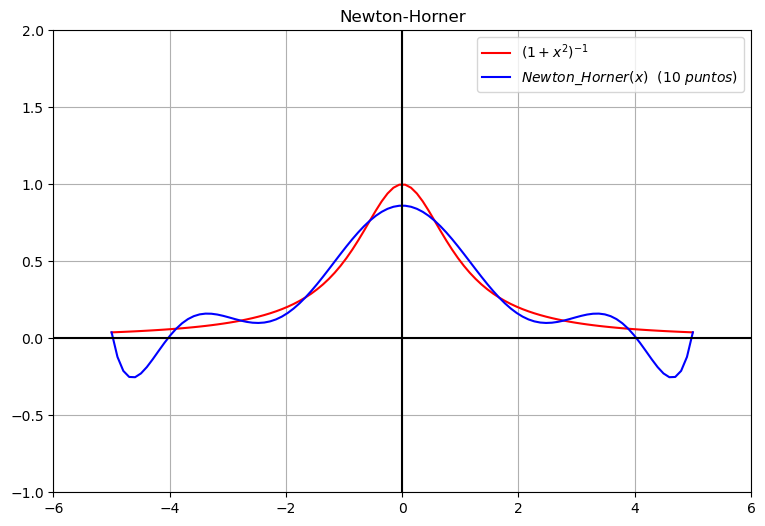

In [7]:
n2=100
array=np.linspace(-5,5,n2)

plt.figure(figsize=(9,6))
plt.title("Newton-Horner")
plt.plot(array,f(array),'r',label="$(1+x^2)^{-1}$")
plt.plot(array,Newton_Horner(puntos,imagenes,array),'b',label= f"$Newton\_Horner(x)\,\,\,\, ({n} \,\,puntos)$")
plt.legend()
plt.grid()
plt.ylim(-1,2)
plt.xlim(-6,6)
plt.plot([0,0],[-1,2],'k')
plt.plot([-6,6],[0,0],'k')

plt.show()